## Assignment 3

### Justin Mattix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment 3/customer_data.csv")

In [3]:
dataset.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
dataset.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

## Impute Missing Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


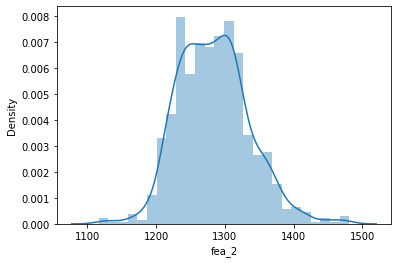

In [5]:
sns.distplot(dataset['fea_2'])

### from the graph we can see this is a fairly normal distribution and we can use the 'most_frequent' strategy to impute the missing values.

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

In [7]:
dataset['fea_2'] = imputer.fit_transform(dataset[['fea_2']])

### next we will check the correlation of the indpenedent variables to the dependent variable

In [8]:
corr_matrix = dataset.corr()
print(corr_matrix)

               label        id     fea_1     fea_2     fea_3     fea_4  \
label   1.000000e+00 -0.024619  0.052071 -0.082921  0.055658 -0.131459   
id     -2.461878e-02  1.000000 -0.094888  0.041058 -0.011086 -0.015092   
fea_1   5.207118e-02 -0.094888  1.000000  0.008955  0.004391 -0.105110   
fea_2  -8.292091e-02  0.041058  0.008955  1.000000 -0.206626  0.297243   
fea_3   5.565787e-02 -0.011086  0.004391 -0.206626  1.000000 -0.119909   
fea_4  -1.314593e-01 -0.015092 -0.105110  0.297243 -0.119909  1.000000   
fea_5   1.729286e-02 -0.046856 -0.020977  0.001391 -0.017062  0.035862   
fea_6   2.890698e-02 -0.066836  0.346629  0.014336  0.161899 -0.137654   
fea_7  -1.227143e-02 -0.027143 -0.030144  0.019799  0.253059 -0.046294   
fea_8  -2.125122e-02  0.025433  0.049951 -0.047225  0.025249 -0.105451   
fea_9   5.590642e-17 -0.013046 -0.055008  0.097860  0.128571  0.100048   
fea_10  8.808212e-04  0.023954  0.108505 -0.041794 -0.117266  0.066553   
fea_11  2.444255e-03  0.029668  0.0950

In [9]:
X = dataset.drop('label', axis = 1)
y = dataset['label']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Stratified K-fold Cross validation with SVC classifier

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

SKFold = StratifiedKFold(n_splits = 10)
SVC_model = SVC(kernel = 'rbf')

In [12]:
result_SKFold = cross_val_score(SVC_model, X, y, cv=SKFold)

In [13]:
SKFold_score = np.mean(result_SKFold)
print(SKFold_score)

0.8000158027812896


## Repeated Random Subsampling with SVC classifier

In [14]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

SVC_model = SVC(kernel='rbf')

ssplit = ShuffleSplit(n_splits=10, test_size = 0.15)

result_ssplit = cross_val_score(SVC_model, X, y, cv=ssplit)

ssplit_score = np.mean(result_ssplit)
print(ssplit_score)

0.8017751479289942


## Randomized Search with Logistic Regression

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(random_state=0)

params = {
    'solver' : ['lbfgs', 'liblinear']
}

random_search = RandomizedSearchCV(estimator = logistic_regressor, param_distributions = params, scoring = 'accuracy' ,n_iter = 10, n_jobs = 1)

random_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=LogisticRegression(random_state=0), n_jobs=1,
                   param_distributions={'solver': ['lbfgs', 'liblinear']},
                   scoring='accuracy')

In [16]:
Log_random_search_score = random_search.best_score_

In [17]:
random_search.best_params_

{'solver': 'lbfgs'}

## Grid Search with SVC Classifier

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

param = {'C' : [0.1, 1, 10],
         'kernel' : ['rbf'],
         'gamma' : [1, 0.1, 0.01, 0.001]}


In [19]:
grid_model = GridSearchCV(model, param, refit = True, verbose = 3)

In [20]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.811 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
print(grid_model.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [23]:
print(grid_model.best_estimator_)

SVC(C=0.1, gamma=1)


In [29]:
print(grid_model.best_score_)
grid_model_score = grid_model.best_score_

0.8088888888888889


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid_model.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       172
           1       0.00      0.00      0.00        53

    accuracy                           0.76       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.58      0.76      0.66       225



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Scores Pretty Table

In [31]:
from prettytable import PrettyTable

In [33]:
myTable = PrettyTable(['Model', 'Best Score'])

myTable.add_row(['Stratified K-Fold', SKFold_score])
myTable.add_row(['Repeated Random Sampling', ssplit_score])
myTable.add_row(['Randomized Search', Log_random_search_score])
myTable.add_row(['Grid Search', grid_model_score])

print(myTable)

+--------------------------+--------------------+
|          Model           |     Best Score     |
+--------------------------+--------------------+
|    Stratified K-Fold     | 0.8000158027812896 |
| Repeated Random Sampling | 0.8017751479289942 |
|    Randomized Search     | 0.8088888888888889 |
|       Grid Search        | 0.8088888888888889 |
+--------------------------+--------------------+
